In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Long Hour Coding - ML/dataset"

post_history.csv  postLinks.db	  posts_long.csv   posts_short.csv
postLinks.csv	  postLinks.json  posts_long.json  users.csv


In [4]:
cd "/content/drive/My Drive/Long Hour Coding - ML/dataset"

/content/drive/My Drive/Long Hour Coding - ML/dataset


In [5]:
ls

post_history.csv  postLinks.db    posts_long.csv   posts_short.csv
postLinks.csv     postLinks.json  posts_long.json  users.csv


In [7]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud               
import re
import os
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
import pickle



In [10]:
if not os.path.isfile('postLinks.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///postLinks.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1

In [11]:
if os.path.isfile('postLinks.db'):
    start = datetime.now()
    con = sqlite3.connect('postLinks.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)

    #Always close the database

    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Download the posts_long.db file from drive or Run above cell to genarate posts_long.db file")



Number of rows in the database : 
 180000
Time taken to count the number of rows : 0:00:00.464829


In [13]:
if os.path.isfile('postLinks.db'):
    start = datetime.now()
    con = sqlite3.connect('postLinks.db')
    df_no_dup = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data GROUP BY Title, Body, Tags', con)
    con.close()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the postLinks.db file from drive or run the first to genarate postLinks.db file")

Time taken to run this cell : 0:00:00.666493


In [14]:
df_no_dup.head(12)

,Title,Body,Tags,cnt_dup
0,1000016,998675,1,1
1,1000069,399656,1,1
2,1000089,992425,1,1
3,1000091,491595,1,1
4,1000091,631410,1,1
5,1000117,999513,1,1
6,1000132,171277,1,1
7,1000163,222359,1,1
8,1000167,867462,1,1
9,1000217,658458,1,1


In [15]:
print("number of duplicate questions :", num_rows['count(*)'].values[0]- df_no_dup.shape[0], "(",(1-((df_no_dup.shape[0])/(num_rows['count(*)'].values[0])))*100,"% )")

number of duplicate questions : 0 ( 0.0 % )


In [16]:
df_no_dup.cnt_dup.value_counts(25)

1    1.0
Name: cnt_dup, dtype: float64

In [17]:
print(df_no_dup.head(12))

      Title    Body Tags  cnt_dup
0   1000016  998675    1        1
1   1000069  399656    1        1
2   1000089  992425    1        1
3   1000091  491595    1        1
4   1000091  631410    1        1
5   1000117  999513    1        1
6   1000132  171277    1        1
7   1000163  222359    1        1
8   1000167  867462    1        1
9   1000217  658458    1        1
10  1000303  500493    1        1
11  1000353  867451    1        1


In [18]:
start = datetime.now()
aa_count=[]
hh=[]
for j in range(len(df_no_dup)):
    tex=df_no_dup['Tags'][j]

    if tex is not None:
      
        hh.append(tex)
        text=len(tex.split(" ") ) 

        aa_count.append(text)    
        
print(len(aa_count))
aaa=pd.DataFrame(aa_count,columns=['tag_count'])
hhh=pd.DataFrame(hh,columns=['Tags'])
df_no_dup=pd.concat([hhh,aaa],axis=1)
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head()
np.where(pd.isnull(df_no_dup))

180000
Time taken to run this cell : 0:00:01.225850


(array([], dtype=int64), array([], dtype=int64))

In [19]:
df_no_dup=df_no_dup.dropna()

In [86]:
start = datetime.now()
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(lambda text: len(text.split(" ")))

# Number of tags per question

df_no_dup.head()

,Tags,tag_count
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [ ]:
df_no_dup.tag_count.value_counts()

1    180000
Name: tag_count, dtype: int64

In [30]:
if not os.path.isfile('postLinks_no_dup.db'):
    disk_dup = create_engine("sqlite:///postLinks_no_dup.db")
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_postLinks', disk_dup)

In [42]:
if os.path.isfile('postLinks.db'):
    start = datetime.now()
    con = sqlite3.connect('postLinks.db')
    tag_data= pd.read_sql_query('SELECT Tags FROM data GROUP BY Title, Body, Tags', con)
    con.close()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the postLinks.db file from drive or run the first to genarate postLinks.db file")

Time taken to run this cell : 0:00:00.340211


In [ ]:
## NO. of Unigue Tags

In [43]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])

In [44]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 180000
Number of unique tags : 2


In [61]:
## Available Tags
tags = vectorizer.get_feature_names()
print("Tags here :", tags[:10])

Tags here : ['1', 'link_type_id']


In [46]:
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [47]:
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,1,179999
1,link_type_id,1


In [48]:
## Distribution of Tags

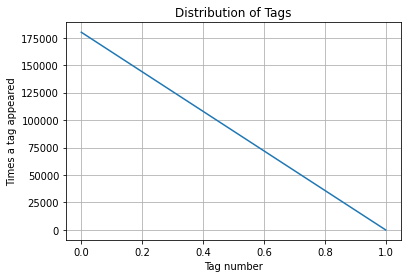

In [51]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

plt.plot(tag_counts)
plt.title("Distribution of Tags")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Times a tag appeared")
plt.show()

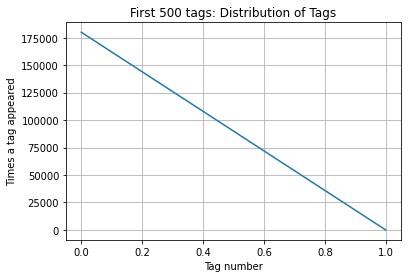

In [53]:
plt.plot(tag_counts[0:500])
plt.title('First 500 tags: Distribution of Tags')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Times a tag appeared")
plt.show()

In [55]:
## Tags Per Question
tag_quest_count = tag_dtm.sum(axis=1).tolist()
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))
print(tag_quest_count[:5])

We have total 180000 datapoints.
[1, 1, 1, 1, 1]


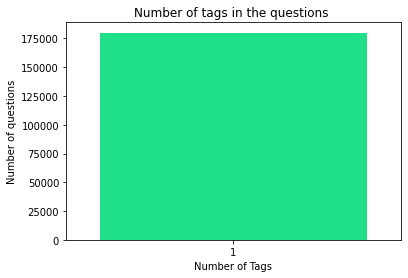

In [56]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

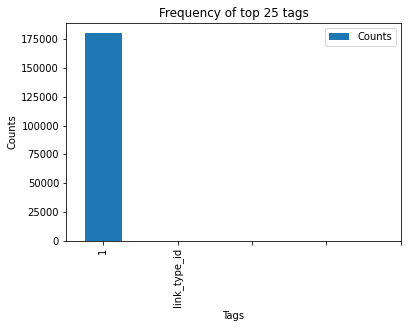

In [59]:
## Top 25 Tags Appearing frequently

i=np.arange(5)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 25 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

In [62]:
train_data_raw = pd.read_csv("postLinks.csv")
train_data_raw.head(5)

,Unnamed: 0,id,creation_date,post_id,related_post_id,link_type_id
0,0,19,2010-04-26T02:59:48.130,109,32412,1
1,1,37,2010-04-26T02:59:48.600,1970,617600,1
2,2,42,2010-04-26T02:59:48.647,2154,2451138,1
3,3,48,2010-04-26T02:59:48.740,2483,496096,1
4,4,52,2010-04-26T02:59:48.757,2572,209329,1


In [83]:
print ("Number of training data: %d" %len(train_data_raw))
qids = pd.Series(train_data_raw['post_id'].tolist() + train_data_raw['related_post_id'].tolist())
print ("Total number of questions: %d" %len(np.unique(qids)))
print ("Number of questions that appear many times: %d" %np.sum(qids.value_counts()>1))

Number of training data: 5292624
Total number of questions: 4998509
Number of questions that appear many times: 1991954
